## MNIST Handwritten Digit Classification Dataset

The MNIST dataset, which stands for the Modified National Institute of Standards and Technology dataset, is a collection of 60,000 small square 28×28 pixel grayscale images of handwritten digits. The digits range from 0 to 9, making it a 10-class classification problem.

The goal is to classify each image into one of 10 classes representing integer values from 0 to 9. The dataset has been extensively studied and is often used as a benchmark for machine learning and deep learning algorithms. Top-performing models, which are typically deep learning convolutional neural networks (CNNs), achieve a classification accuracy above 99%, with error rates between 0.4% and 0.2% on the test dataset.


## Applying CNN on the MNIST Dataset with Keras
Here is a step-by-step approach to applying a CNN on the MNIST dataset:

### 1. Data Loading and Preprocessing
The MNIST dataset can be easily loaded with the Keras library. After loading, normalize the images to have pixel values between 0 and 1, facilitating efficient training.

### 2. Define the CNN Architecture
Use the Keras Sequential API to build the model, allowing a simple layer-by-layer approach. A typical CNN includes convolutional layers, pooling layers, and fully-connected layers for feature extraction and classification.

### 3. Compile the Model
Before training, compile the model with a suitable loss function (such as categorical cross-entropy), an optimizer (like Adam), and a metric for evaluation (often accuracy).

### 4. Train the Model
Train the model on the training set using the `fit()` function in Keras. Monitor the training accuracy and loss during the training process to ensure proper convergence.

### 5. Evaluate the Model
After training, evaluate the model's performance on the test set with the `evaluate()` function. The most common evaluation metric for classification tasks is accuracy.

By following these steps, you can implement a CNN to classify handwritten digits in the MNIST dataset using Keras in Python.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


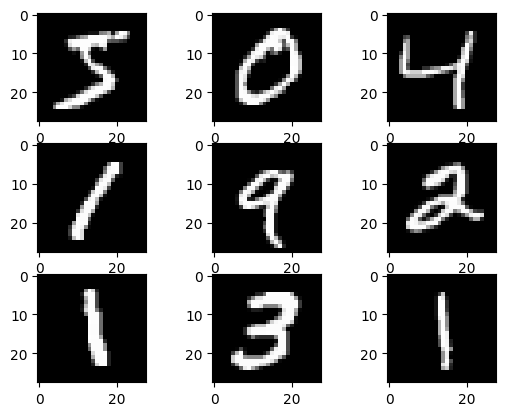

In [25]:
# example of loading the mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [43]:
# deeper cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
from PIL import Image
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [27]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [28]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [29]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_x_norm = train_norm / 255.0
test_x_norm = test_norm / 255.0

In [30]:
# define cnn model
def define_model():
	"""
	Defines and returns a convolutional neural network model for handwritten digit recognition.
	"""
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [31]:

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories, model

In [32]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [33]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [34]:
# evaluate model
scores, histories, model  = evaluate_model(train_x_norm, trainY)

> 98.883
> 99.033
> 98.975
> 99.250
> 98.958


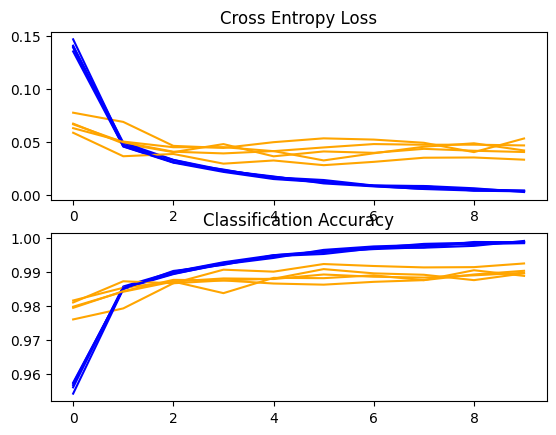

In [35]:
# learning curves
summarize_diagnostics(histories)

Accuracy: mean=99.020 std=0.125, n=5


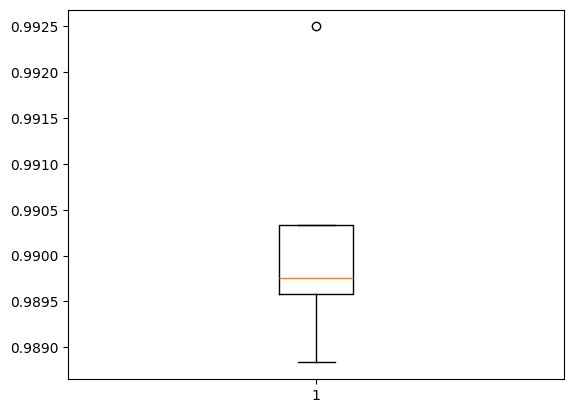

In [36]:
# summarize estimated performance
summarize_performance(scores)

313/313 [==============================] - 4s 12ms/step


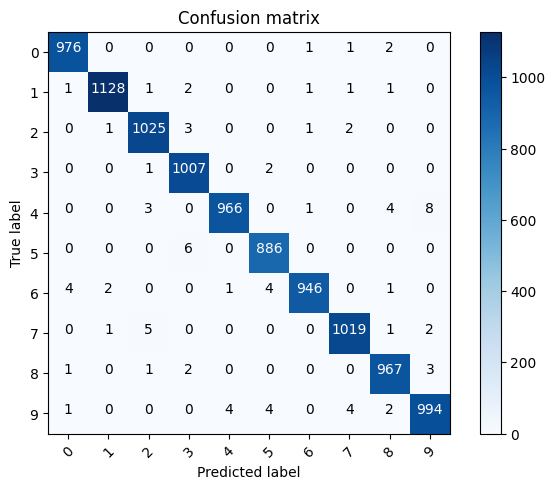

[[ 976    0    0    0    0    0    1    1    2    0]
 [   1 1128    1    2    0    0    1    1    1    0]
 [   0    1 1025    3    0    0    1    2    0    0]
 [   0    0    1 1007    0    2    0    0    0    0]
 [   0    0    3    0  966    0    1    0    4    8]
 [   0    0    0    6    0  886    0    0    0    0]
 [   4    2    0    0    1    4  946    0    1    0]
 [   0    1    5    0    0    0    0 1019    1    2]
 [   1    0    1    2    0    0    0    0  967    3]
 [   1    0    0    0    4    4    0    4    2  994]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99   

In [39]:
#plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(test_x_norm)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(testY, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# show the figure
plt.show()

# show the confusion matrix
print(confusion_mtx)

# classification report

print(classification_report(Y_true, Y_pred_classes))


In [37]:
# save model
model.save('final_model.h5')

C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


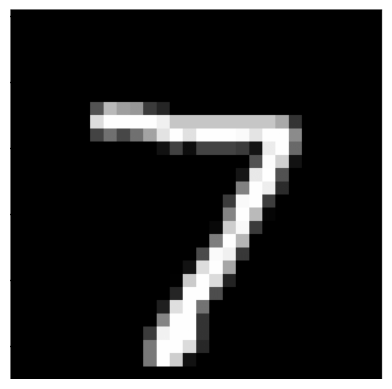

In [40]:
# Load the image
image_path = 'sample_image.png'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove the axis labels
plt.show()


In [42]:
# make a prediction for a new image.
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print("Predicted Digit is: ",digit)

# entry point, run the example
run_example()

C:\Users\Morshedy\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 430ms/step
Predicted Digit is:  7


**Thank you for reading.**